In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('HW1.csv')

# Display the first few rows of the dataset
data.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


Model for X1: Y = 5.859208469587321 + -2.0115825039221686*X1
Model for X2: Y = 0.7307512257200968 + 0.5596740020661445*X2
Model for X3: Y = 2.8420598533051726 + -0.5088702809869871*X3


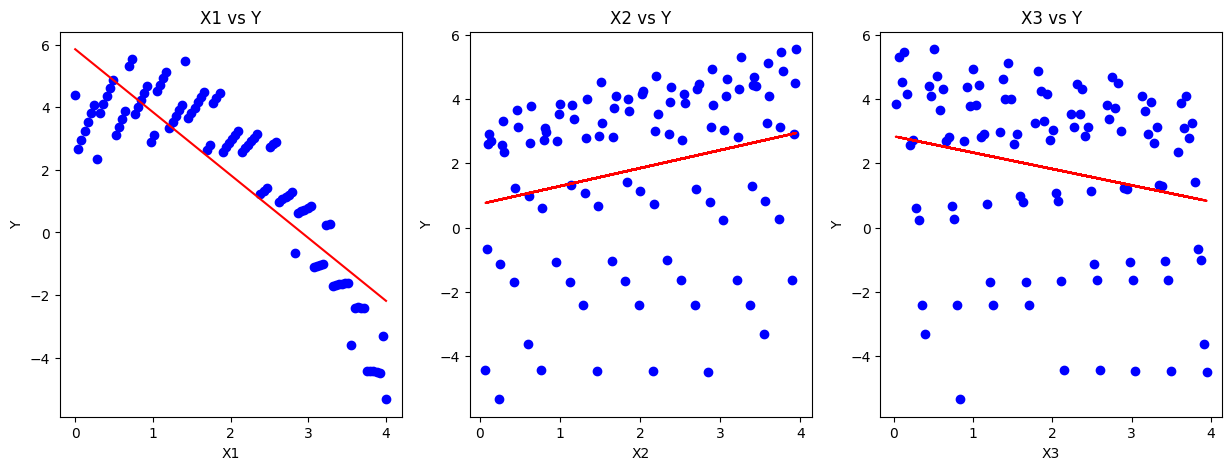

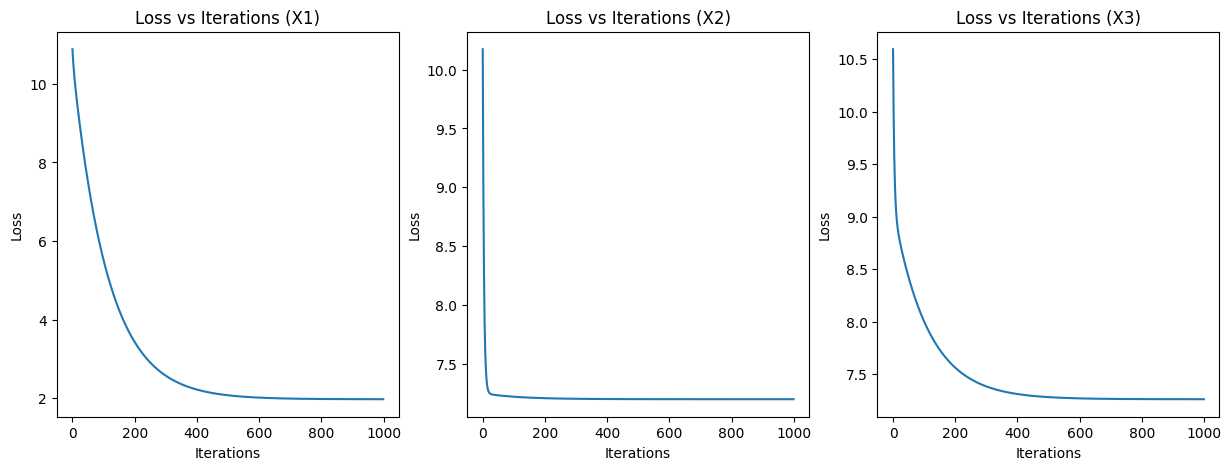

Final loss for X1: 1.9711918429693418
Final loss for X2: 7.198739228342082
Final loss for X3: 7.2591264045820125
X1 has the lowest loss.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gradient descent function
def gradient_descent(X, y, learning_rate, epochs):
    m = len(y)
    theta = np.zeros(2)
    X_b = np.c_[np.ones((m, 1)), X]  # Add a column of ones for the intercept term
    loss_history = []

    for epoch in range(epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
        loss = np.mean((X_b.dot(theta) - y) ** 2)
        loss_history.append(loss)

    return theta, loss_history

# Load the dataset
data = pd.read_csv('HW1.csv')
X1 = data.iloc[:, 0].values
X2 = data.iloc[:, 1].values
X3 = data.iloc[:, 2].values
Y = data.iloc[:, 3].values

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Train the models for each explanatory variable
theta1, loss_history1 = gradient_descent(X1, Y, learning_rate, epochs)
theta2, loss_history2 = gradient_descent(X2, Y, learning_rate, epochs)
theta3, loss_history3 = gradient_descent(X3, Y, learning_rate, epochs)

# Report the models
print(f"Model for X1: Y = {theta1[0]} + {theta1[1]}*X1")
print(f"Model for X2: Y = {theta2[0]} + {theta2[1]}*X2")
print(f"Model for X3: Y = {theta3[0]} + {theta3[1]}*X3")

# Plot the final regression models and loss over iterations
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X1, Y, color='blue')
plt.plot(X1, theta1[0] + theta1[1] * X1, color='red')
plt.title('X1 vs Y')
plt.xlabel('X1')
plt.ylabel('Y')

plt.subplot(1, 3, 2)
plt.scatter(X2, Y, color='blue')
plt.plot(X2, theta2[0] + theta2[1] * X2, color='red')
plt.title('X2 vs Y')
plt.xlabel('X2')
plt.ylabel('Y')

plt.subplot(1, 3, 3)
plt.scatter(X3, Y, color='blue')
plt.plot(X3, theta3[0] + theta3[1] * X3, color='red')
plt.title('X3 vs Y')
plt.xlabel('X3')
plt.ylabel('Y')

plt.show()

# Plot the loss over iterations
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(loss_history1)
plt.title('Loss vs Iterations (X1)')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.subplot(1, 3, 2)
plt.plot(loss_history2)
plt.title('Loss vs Iterations (X2)')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.subplot(1, 3, 3)
plt.plot(loss_history3)
plt.title('Loss vs Iterations (X3)')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.show()

# Determine which variable has the lowest loss
final_loss1 = loss_history1[-1]
final_loss2 = loss_history2[-1]
final_loss3 = loss_history3[-1]

print(f"Final loss for X1: {final_loss1}")
print(f"Final loss for X2: {final_loss2}")
print(f"Final loss for X3: {final_loss3}")

min_loss = min(final_loss1, final_loss2, final_loss3)
if min_loss == final_loss1:
    print("X1 has the lowest loss.")
elif min_loss == final_loss2:
    print("X2 has the lowest loss.")
else:
    print("X3 has the lowest loss.")


In [5]:
print("Problem 2!")

Problem 2!


Final Model: Y = 4.608544226848997 + -1.904038350330247*X1 + 0.64916315916548*X2 + -0.16217188270176652*X3


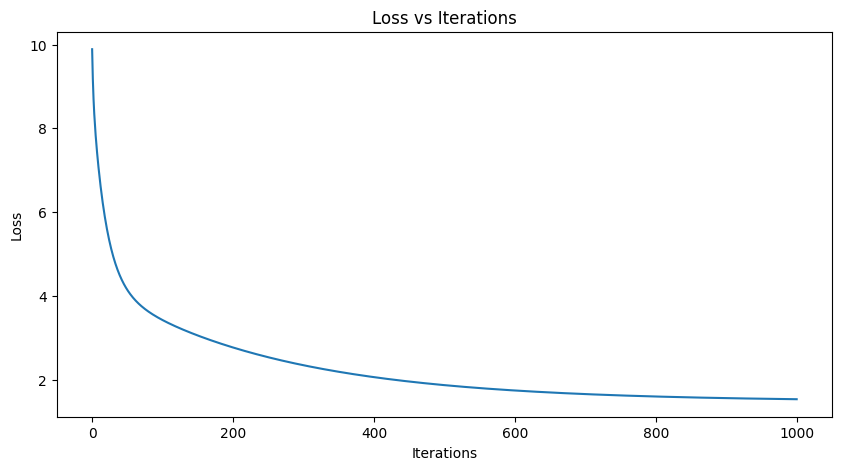

Predictions for new values:
For [1 1 1]: Predicted Y = 3.1914971529824627
For [2 0 4]: Predicted Y = 0.15177999538143716
For [3 2 1]: Predicted Y = 0.03258361148744893


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-6-ae409e5120cf>:15: RuntimeWarning: overflow encountered in square
  loss = np.mean((X_b.dot(theta) - y) ** 2)


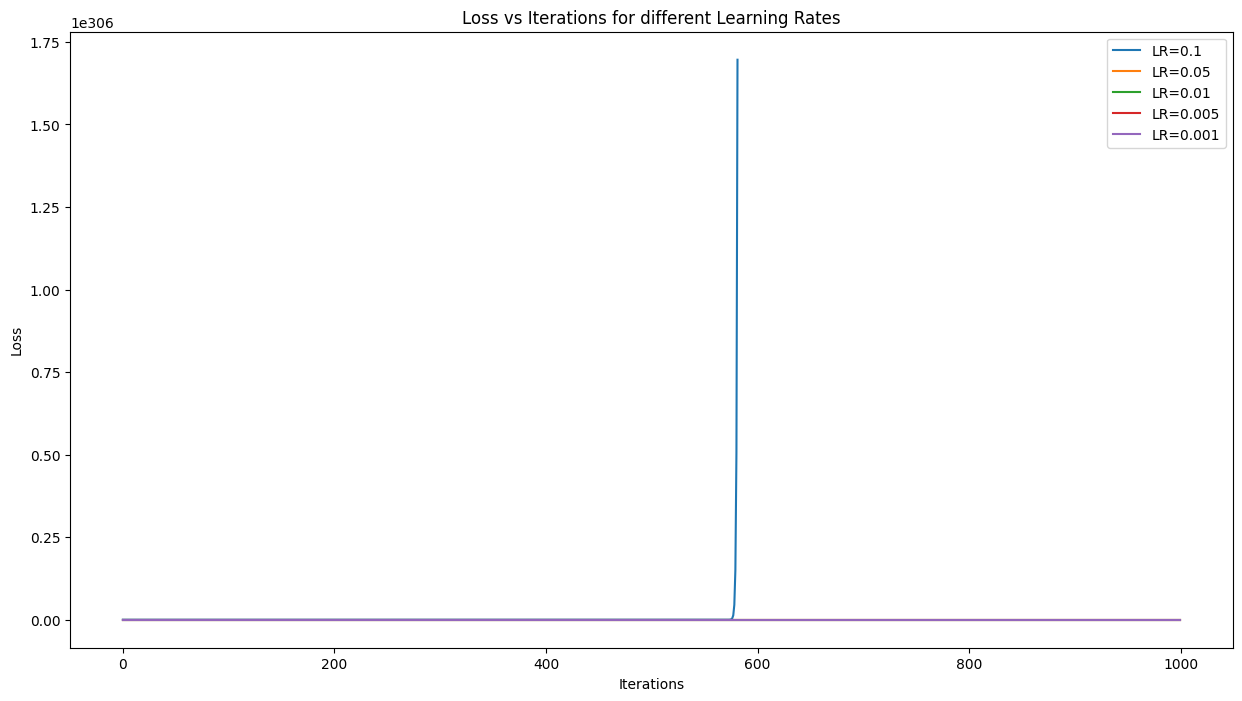

Final loss for learning rate 0.1: inf
Final loss for learning rate 0.05: 1.4769284888413086
Final loss for learning rate 0.01: 1.5299731911076018
Final loss for learning rate 0.005: 1.8675672018881604
Final loss for learning rate 0.001: 3.430259551552181


In [6]:
# Extract explanatory variables and the dependent variable
X = data.iloc[:, 0:3].values
Y = data.iloc[:, 3].values

# Define the gradient descent function for multivariate linear regression
def gradient_descent_multi(X, y, learning_rate, epochs):
    m = len(y)
    theta = np.zeros(X.shape[1] + 1)
    X_b = np.c_[np.ones((m, 1)), X]  # Add a column of ones for the intercept term
    loss_history = []

    for epoch in range(epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
        loss = np.mean((X_b.dot(theta) - y) ** 2)
        loss_history.append(loss)

    return theta, loss_history

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Train the model using all three explanatory variables
theta, loss_history = gradient_descent_multi(X, Y, learning_rate, epochs)

# Report the final model
print(f"Final Model: Y = {theta[0]} + {theta[1]}*X1 + {theta[2]}*X2 + {theta[3]}*X3")

# Plot the loss over iterations
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title('Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Predict values for new (X1, X2, X3) values
new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
X_new_b = np.c_[np.ones((new_values.shape[0], 1)), new_values]  # Add a column of ones for the intercept term
predictions = X_new_b.dot(theta)

print("Predictions for new values:")
for i, pred in enumerate(predictions):
    print(f"For {new_values[i]}: Predicted Y = {pred}")

# Experiment with different learning rates to observe their impact
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]
results = {}

for lr in learning_rates:
    theta, loss_history = gradient_descent_multi(X, Y, lr, epochs)
    results[lr] = loss_history

# Plot the loss for different learning rates
plt.figure(figsize=(15, 8))

for lr, loss_history in results.items():
    plt.plot(loss_history, label=f'LR={lr}')

plt.title('Loss vs Iterations for different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Analyze the impact of different learning rates
for lr, loss_history in results.items():
    final_loss = loss_history[-1]
    print(f"Final loss for learning rate {lr}: {final_loss}")